# Semi Supervised Learning - Baseline Model

This notebook is to perform supervised learning on a particular classifier from assignment 1 to construct a baseline model for the semi-supervised learning. See the Gradient Boosting model handled in `CSI5155 Assignment 1 Modelling Part- Kelvin Mock 300453668.ipynb` (assignment 1).

## Import Necessary Packages

In [1]:
import numpy as np;
import os;
import sys;
import joblib;
import random;
from sklearn.model_selection import train_test_split;
# importing custom modules
sys.path.append("../Assignment 1 - Model Comparison/");
from fileOrganizer import unpack;
from performance import plotROC;
import constants;

## Load the Column Names

In [2]:
columns = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.COLUMNS_DIR,
    constants.COLUMNS_FILENAME
));
print("Columns in a sample: ", columns);

Columns in a sample:  ['age' 'gender' 'education' 'country' 'ethnicity' 'nscore' 'escore'
 'oscore' 'ascore' 'cscore' 'impuslive' 'ss']


## Load the Data

Note: We load the original samples and labels array from the training set and test set respectively. The data are stratified during the split in assignment 1. The size of the test set is of the ratio 1/3. 

In [3]:
mush_X_train = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.X_TRAIN_FILENAME
));
print("Number of Samples in Training Set: ", len(mush_X_train));
print("Number of Features in Training Set: ", len(mush_X_train[random.randint(0, len(mush_X_train)-1)]));
print("Value range of the original Training Set: ", np.min(mush_X_train), np.max(mush_X_train));

Number of Samples in Training Set:  1256
Number of Features in Training Set:  12
Value range of the original Training Set:  -3.46436 3.46436


In [4]:
mush_y_train = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.Y_TRAIN_FILENAME
));
print("Number of Samples in Training Set: ", len(mush_y_train));
print("Unique Labels in Training Set: ", np.unique(mush_y_train));

Number of Samples in Training Set:  1256
Unique Labels in Training Set:  ['non-user' 'user']


In [5]:
mush_X_test = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.X_TEST_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_X_test));
print("Number of Features in Testing Set: ", len(mush_X_test[random.randint(0, len(mush_X_test)-1)]));
print("Value range of the original Testing Set: ", np.min(mush_X_test), np.max(mush_X_test));

Number of Samples in Testing Set:  629
Number of Features in Testing Set:  12
Value range of the original Testing Set:  -3.27393 3.27393


In [6]:
mush_y_test = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.Y_TEST_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_y_test));
print("Unique Labels in Testing Set: ", np.unique(mush_y_test));

Number of Samples in Testing Set:  629
Unique Labels in Testing Set:  ['non-user' 'user']


### Loading also the Normalized Data

In [7]:
mush_X_train_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.X_TRAIN_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Training Set: ", len(mush_X_train_norm));
print("Number of Features in the Normalized Training Set: ", len(mush_X_train_norm[random.randint(0, len(mush_X_train_norm)-1)]));
print("Value range of the original Training Set: ", np.min(mush_X_train_norm), np.max(mush_X_train_norm));

Number of Normalized Samples in Training Set:  1256
Number of Features in the Normalized Training Set:  12
Value range of the original Training Set:  -4.827248760778992 13.457018899436779


In [8]:
mush_y_train_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TRAIN_DIR,
    constants.Y_TRAIN_NORMALIZED_FILENAME
));
print("Number of Samples in Training Set: ", len(mush_y_train_norm));
print("Unique Labels in Training Set: ", np.unique(mush_y_train_norm));

Number of Samples in Training Set:  1256
Unique Labels in Training Set:  [0 1]


In [9]:
mush_X_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.X_TEST_NORMALIZED_FILENAME
));
print("Number of Normalized Samples in Testing Set: ", len(mush_X_test_norm));
print("Number of Features in the Normalized Testing Set: ", len(mush_X_test_norm[random.randint(0, len(mush_X_test_norm)-1)]));
print("Value range of the Normalized Testing Set: ", np.min(mush_X_test_norm), np.max(mush_X_test_norm));

Number of Normalized Samples in Testing Set:  629
Number of Features in the Normalized Testing Set:  12
Value range of the Normalized Testing Set:  -4.827248760778992 13.457018899436779


In [10]:
mush_y_test_norm = joblib.load(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.TEST_DIR,
    constants.Y_TEST_NORMALIZED_FILENAME
));
print("Number of Samples in Testing Set: ", len(mush_y_test_norm));
print("Unique Labels in Testing Set: ", np.unique(mush_y_test_norm));

Number of Samples in Testing Set:  629
Unique Labels in Testing Set:  [0 1]


## Load the Model

Note: We load the trained version of the model.

In [11]:
# Gradient Boost (Trained)
supervisedModel = unpack(os.path.join(
    os.pardir,
    constants.ASM1_DIR,
    constants.MUSH_DIR,
    constants.POSTTRAINED_DIR,
    constants.MODEL_FILENAME
));
supervisedModel

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': array([ 6,  8,  4, 14, 12,  9,  9,  3,  7, 17, 19,  1, 19, 17, 15, 12, 16,
       18,  2,  8, 15,  9, 12,  2,  8, 17, 11,  1, 14, 15, 13,  4,  1, 19,
       12, 15,  6, 19,  9, 17, 10, 12, 16,  3,  5, 13, 10, 19,  5,  5,  4,
       10,  6,  4,  5,  2, 17,  1,  1,  5, 10,  1, 10, 11,  8, 14, 13, 12,
        8, 17, 14,  1,  3,  4, 19, 10,  6, 19, 14,  2, 19, 15, 13,  7,  5,
        3,  4,  3, 14, 10,  5, 16, 10,  5, 16, 15,  4,  8, 17,  8],
      dtype=int64),
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000024FF3BC6530>},
                   random_state=42)

## Split the Datasets into Labelled and Unlabelled sets

Note: We use normalized data here.

In [12]:
X_train_labelled,  X_trained_unlabelled, y_train_labelled, y_train_unlabelled = train_test_split(
    mush_X_train_norm,
    mush_y_train_norm,
    test_size=1-constants.LABELLED_PORTION,
    random_state=constants.RANDOM_STATE
)
print("Number of Labelled Samples: ", len(X_train_labelled));
print("Number of Unlabelled Samples: ", len(X_trained_unlabelled));
print("Number of Features in Labelled Samples: ", len(X_train_labelled[random.randint(0, len(X_train_labelled))]));
print("Number of Features in Unlabelled Samples: ", len(X_trained_unlabelled[random.randint(0, len(X_trained_unlabelled))]));
print("Value range of the Labelled Samples: ", np.min(X_train_labelled), np.max(X_train_labelled));
print("Value range of the Unlabelled Samples: ", np.min(X_trained_unlabelled), np.max(X_trained_unlabelled));
print("Unique Labels in Labelled Samples: ", np.unique(y_train_labelled));
print("Unique Labels in Unlabelled Samples: ", np.unique(y_train_unlabelled));
print("Size of a random sample from Labelled Samples: ", X_train_labelled[random.randint(0, len(X_train_labelled))]);

Number of Labelled Samples:  251
Number of Unlabelled Samples:  1005
Number of Features in Labelled Samples:  12
Number of Features in Unlabelled Samples:  12
Value range of the Labelled Samples:  -4.827248760778992 3.262658784576777
Value range of the Unlabelled Samples:  -4.827248760778992 13.457018899436779
Unique Labels in Labelled Samples:  [0 1]
Unique Labels in Unlabelled Samples:  [0 1]
Size of a random sample from Labelled Samples:  [-1.10562725  0.98734126  0.48290488 -1.336376   -0.03415465 -0.04694174
  0.3103117  -0.01436282 -2.57264464  0.74636506  0.91537982  0.8035009 ]


## Train the Model with Labelled Data

In [13]:
supervisedModel.fit(X_train_labelled, y_train_labelled);

## Save the Baseline Model and Related Data

In [14]:
# save the model (trained with labelled data) in the current project directory
if (constants.MODEL_DIR not in os.listdir(os.curdir)):
    os.mkdir(constants.MODEL_DIR);
joblib.dump(supervisedModel, os.path.join(
    constants.MODEL_DIR,
    constants.MODEL_FILENAME
));

In [15]:
# save the original training set data in the current project directory
if (constants.TRAIN_DIR not in os.listdir(os.curdir)):
    os.mkdir(constants.TRAIN_DIR);
# original training set
joblib.dump(mush_X_train, os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_FILENAME
));
joblib.dump(mush_y_train, os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_FILENAME
));
# normalized training set
joblib.dump(mush_X_train_norm, os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_NORMALIZED_FILENAME
));
joblib.dump(mush_y_train_norm, os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_NORMALIZED_FILENAME
));

In [16]:
# save the original testing set data in the current project directory
if (constants.TEST_DIR not in os.listdir(os.curdir)):
    os.mkdir(constants.TEST_DIR);
# original testing set
joblib.dump(mush_X_test, os.path.join(
    constants.TEST_DIR,
    constants.X_TEST_FILENAME
));
joblib.dump(mush_y_test, os.path.join(
    constants.TEST_DIR,
    constants.Y_TEST_FILENAME
));
# normalized testing set
joblib.dump(mush_X_test_norm, os.path.join(
    constants.TEST_DIR,
    constants.X_TEST_NORMALIZED_FILENAME
));
joblib.dump(mush_y_test_norm, os.path.join(
    constants.TEST_DIR,
    constants.Y_TEST_NORMALIZED_FILENAME
));

In [17]:
# save the column names in the current project directory
if (constants.COLUMNS_DIR not in os.listdir(os.curdir)):
    os.mkdir(constants.COLUMNS_DIR);
joblib.dump(columns, os.path.join(
    constants.COLUMNS_DIR,
    constants.COLUMNS_FILENAME
));

In [18]:
# Save the data after split
# labelled data
joblib.dump(X_train_labelled, os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_LABELLED_FILENAME
));
joblib.dump(y_train_labelled, os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_LABELLED_FILENAME
));
# unlabeled data
joblib.dump(X_trained_unlabelled, os.path.join(
    constants.TRAIN_DIR,
    constants.X_TRAIN_UNLABELLED_FILENAME
));
joblib.dump(y_train_unlabelled, os.path.join(
    constants.TRAIN_DIR,
    constants.Y_TRAIN_UNLABELLED_FILENAME
));

### Display the ROC Curve and its Area Under the Curve (AUC)

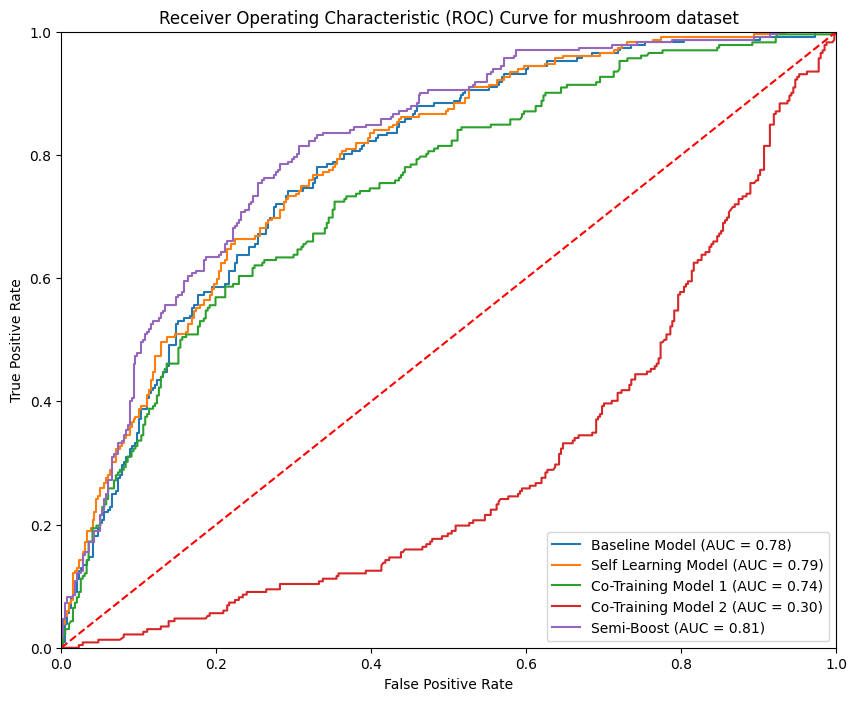

AUC of the Baseline Model: 0.7813015721358464
AUC of the Self Learning Model: 0.7883696690697474
AUC of the 1st Co-Training Model: 0.7422207504560062
AUC of the 2nd Co-Training Model: 0.2978589420654912
AUC of the Semi boost Model: 0.8103665421697211


In [19]:
features_subsets = joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.CO_TRAINING_BEST_FEATURE_SPLIT_RESULTS_FILENAME
        ));
AUC_baseline, AUC_selftraining, AUC_cotraining1, AUC_cotraining2, AUC_semiboost = plotROC(
    models={
        "Baseline Model": supervisedModel,
        "Self Learning Model": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_SELFTRAIN_FILENAME
        )),
        "Co-Training Model 1": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_COTRAIN_1_FILENAME
        )),
        "Co-Training Model 2": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_COTRAIN_2_FILENAME
        )),
        "Semi-Boost": joblib.load(os.path.join(
            constants.MODEL_DIR,
            constants.MODEL_SEMIBOOST_FILENAME
        ))
    },
    X_test=mush_X_test_norm,
    y_test=mush_y_test_norm,
    feature_subsets={
        "Co-Training Model 1": features_subsets["features_view1"],
        "Co-Training Model 2": features_subsets["features_view2"],
    },
    dataset="mushroom"
);
print(f"AUC of the Baseline Model: {AUC_baseline}");
print(f"AUC of the Self Learning Model: {AUC_selftraining}");
print(f"AUC of the 1st Co-Training Model: {AUC_cotraining1}");
print(f"AUC of the 2nd Co-Training Model: {AUC_cotraining2}");
print(f"AUC of the Semi boost Model: {AUC_semiboost}");